In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Import Dataset

In [3]:
dataset = "/content/drive/MyDrive/Data/Data Pre Processing/Data.csv"

In [6]:
data_df = pd.read_csv(dataset)

In [7]:
data_df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


#### Data Imputation (Missing Data Replacement)

Tập dữ liệu thường có các giá trị bị thiếu và điều này có thể gây ra sự cố cho các thuật toán học máy. Việc xác định và thay thế các giá trị bị thiếu trong mỗi cột của tập ngày trước khi thực hiện mô hình dự đoán được coi là phương pháp hay. Phương pháp thay thế dữ liệu bị thiếu này được gọi là truyền dữ liệu.

In [11]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [15]:
for col in data_df.columns:
  missing_data = data_df[col].isna().sum()
  missing_percent = missing_data/len(data_df)*100
  print(f'Columns {col}: has {missing_percent}% missing data')

Columns Country: has 0.0% missing data
Columns Age: has 10.0% missing data
Columns Salary: has 10.0% missing data
Columns Purchased: has 0.0% missing data


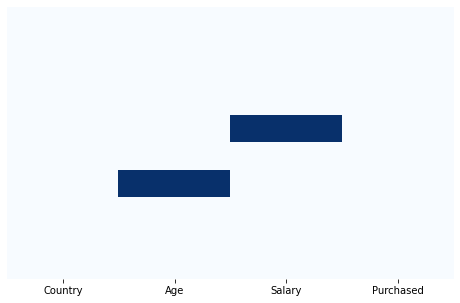

In [17]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(data_df.isna(), cmap="Blues", cbar=False, yticklabels=False);

In [18]:
data_df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [22]:
x = data_df.iloc[:,:-1].values

In [23]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [24]:
y = data_df.iloc[:,-1].values

In [25]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [26]:
from sklearn.impute import SimpleImputer

In [27]:
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

In [28]:
imputer.fit(x[:,1:3])
x[:,1:3] = imputer.transform(x[:,1:3])

In [29]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

#### Encode Categorical Data

Encode Independent variable (X)

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


ct = ColumnTransformer(transformers=[('encode', OneHotEncoder(), [0])], remainder='passthrough')
x = ct.fit_transform(x)

In [31]:
x

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

Encode Dependent variable (y)

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [33]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

#### Splitting the dataset (X = data, y = output) into the Training set and Test set

In [54]:
from sklearn.model_selection import train_test_split

np.random.seed(21)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [55]:
X_train

array([[1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [56]:
y_train

array([1, 0, 1, 0, 0, 1, 0, 1])

In [57]:
X_test

array([[0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0]], dtype=object)

In [58]:
y_test

array([1, 0])

#### Feature Scaling

In [59]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])

In [60]:
X_train

array([[1.0, 0.0, 0.0, 1.3143132035311933, 1.2201540705379141],
       [0.0, 0.0, 1.0, -0.6612724051169467, -0.6058501735927282],
       [1.0, 0.0, 0.0, -1.2539480877113887, -0.9101842142811686],
       [0.0, 0.0, 1.0, -0.5076157466665356, -1.5188522956580495],
       [1.0, 0.0, 0.0, 0.5240789600719373, 0.5100413089315532],
       [0.0, 1.0, 0.0, -0.2661552833873187, -0.3240593951775053],
       [0.0, 1.0, 0.0, 1.7094303252608214, 1.6259327914558346],
       [1.0, 0.0, 0.0, -0.8588309659817607, 0.002817907784152554]],
      dtype=object)

In [61]:
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [62]:
X_test

array([[0.0, 0.0, 1.0, -2.8344165746299006, -1.92463101657597],
       [0.0, 1.0, 0.0, -2.241740892035459, -1.3159629351990891]],
      dtype=object)